adapted from: https://www.kaggle.com/uzairrj/beg-tut-intel-image-classification-93-76-accur

In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import mode

Using TensorFlow backend.


In [2]:
def get_images(directory):
    train_images = []
    train_labels = []
    label_dict = {'glacier':2, 'sea':4, 'buildings':0, 'forest':1, 'street':5, 'mountain':3}
    for folder in os.listdir(directory):
        label = label_dict[folder]
        for image_file in os.listdir(directory+folder):
            image = cv2.imread(directory+folder+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes
            train_images.append(image)
            train_labels.append(label)
    
    return shuffle(train_images, train_labels, random_state=412345)

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

def my_resize(data):
    images = []
    for i in range(data.shape[0]):
        img = data[i]
        images.append(cv2.resize(img,(150,150)))
    return np.array(images)

In [3]:
Images, Labels = get_images('./seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [4]:
Images = Images / 255.0

In [9]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 200)     5600      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 200)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 140)       252140    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 50)        63050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1250)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               225180    
__________

In [10]:
trained = model.fit(Images,Labels,epochs=5,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/5
9823/9823 [==============================] - 583s 59ms/sample - loss: 1.4632 - acc: 0.4105 - val_loss: 1.1317 - val_acc: 0.5844
Epoch 2/5
9823/9823 [==============================] - 582s 59ms/sample - loss: 1.1796 - acc: 0.5504 - val_loss: 0.9362 - val_acc: 0.6599
Epoch 3/5
9823/9823 [==============================] - 586s 60ms/sample - loss: 1.0492 - acc: 0.6058 - val_loss: 0.8318 - val_acc: 0.6958
Epoch 4/5
9823/9823 [==============================] - 585s 60ms/sample - loss: 0.9331 - acc: 0.6554 - val_loss: 0.7614 - val_acc: 0.7124
Epoch 5/5
9823/9823 [==============================] - 588s 60ms/sample - loss: 0.8558 - acc: 0.6898 - val_loss: 0.6752 - val_acc: 0.7526


In [3]:
test_images,test_labels = get_images('./seg_test/')
test_images = np.array(test_images)
test_images = test_images / 255.0
test_labels = np.array(test_labels)

In [4]:
model.evaluate(test_images,test_labels, verbose=1)

3000/3000 [==============================] - 47s 16ms/sample - loss: 0.6995 - acc: 0.7453


[0.6995151333808899, 0.7453333]

In [4]:
X_test = np.array(test_images, dtype = 'float32') #converting the list of images to numpy array.
y_test = np.array(test_labels, dtype = 'int32')


segtest_x = []
segtest_y = []

for image in X_test:
    segtest_x.append(image[:50,:50,:])
    segtest_x.append(image[:50,50:100,:])
    segtest_x.append(image[:50,100:150,:])
    segtest_x.append(image[50:100,:50,:])
    segtest_x.append(image[50:100,50:100,:])
    segtest_x.append(image[50:100,100:150,:])
    segtest_x.append(image[100:,:50,:])
    segtest_x.append(image[100:,50:100,:])
    segtest_x.append(image[100:,100:150,:])

for label in y_test:
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    segtest_y.append(label)
    
    
segtest_x = np.array(segtest_x)
segtest_y = np.array(segtest_y)

In [6]:
segtest_x.shape

(27000, 50, 50, 3)

In [7]:
segtest_resize = my_resize(segtest_x)
segtest_resize.shape

(27000, 150, 150, 3)

In [9]:
model.evaluate(segtest_resize,segtest_y, verbose=1)

27000/27000 [==============================] - 457s 17ms/sample - loss: 1.7713 - acc: 0.3298


[1.7712995496679236, 0.32981482]

In [9]:
predictions = model.predict(segtest_resize)

In [6]:
#Accuracy scores for the grid positions
pred_class = np.argmax(predictions, axis=1)

grid_class = pred_class.reshape((3000,3,3))
grid_label = segtest_y.reshape((3000,3,3))
grid_score = np.sum(grid_class==grid_label, axis=0)/y_test.shape[0]
grid_score

array([[0.27733333, 0.271     , 0.275     ],
       [0.40333333, 0.41133333, 0.402     ],
       [0.31766667, 0.30266667, 0.308     ]])

In [11]:
#Predict Complete Image class by combining grid sub-image 
pred_mode=[]
pred_top=[]
pred_weighted=[]

for i in range(3000):
    lower = i*9
    upper = lower+9
    image_pred = predictions[lower:upper][:] #Every 9 images make up a complete test image
    
    pred_label = np.argmax(image_pred, axis = 1) #Index of largest probability gives the class
    pred_mode.append(mode(pred_label)[0][0]) #Add mode class of 9 piece (3x3) grid
    
    top_index = np.unravel_index(np.argmax(image_pred, axis=None), image_pred.shape) #Get index (tuple) of largest prob. in grid
    pred_top.append(top_index[1]) #Add index position that determines class
    
    all_seg = np.sum(image_pred, axis=0) #Sum all of the class probabilities between the grid pieces
    pred_weighted.append(np.argmax(all_seg)) #Take the class index of the largest probability

pred_mode = np.array(pred_mode)
pred_top = np.array(pred_top)
pred_weighted = np.array(pred_weighted)

In [12]:
score_mode = np.sum(pred_mode==y_test)/y_test.shape[0]
score_top = np.sum(pred_top==y_test)/y_test.shape[0]
score_weighted = np.sum(pred_weighted==y_test)/y_test.shape[0]
print("score_mode =",score_mode)
print("score_top =",score_top)
print("score_weighted =",score_weighted)

score_mode = 0.33466666666666667
score_top = 0.384
score_weighted = 0.34833333333333333


In [18]:
classes = ['buildings','forest','glacier','mountain','sea','street']
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_test, pred_weighted)
print(conf_mx)

[[114   1  17  16 286   3]
 [144 195  12   5  94  24]
 [  3   0  69 109 372   0]
 [  6   1  12 173 333   0]
 [  2   1   1  27 478   1]
 [159   2  12   4 308  16]]


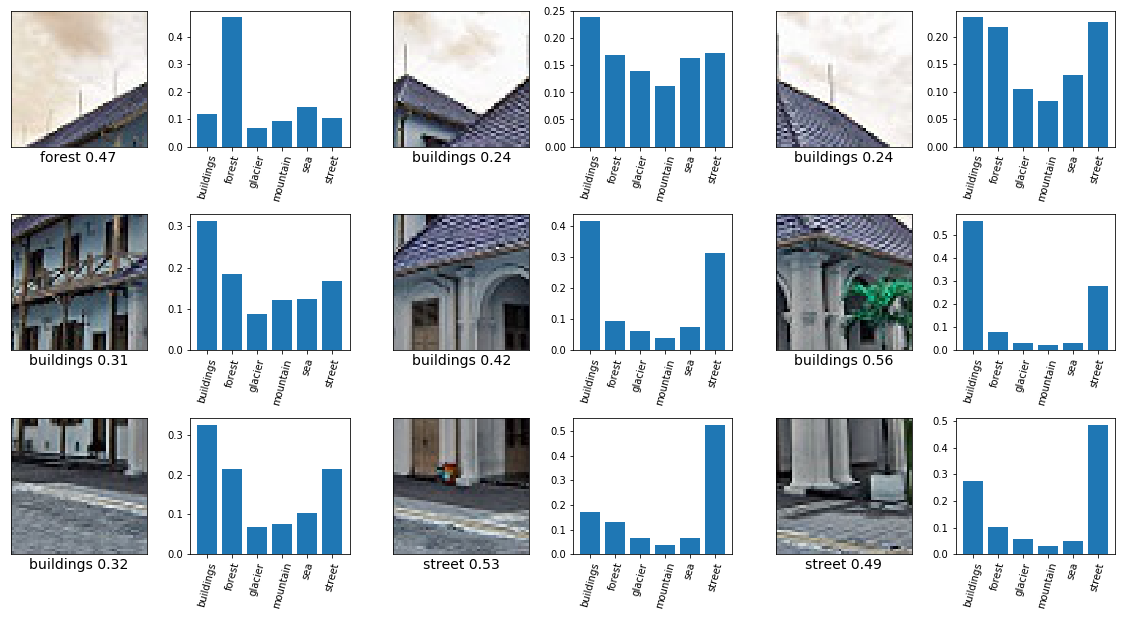

<Figure size 432x288 with 0 Axes>

In [15]:
classes = ['buildings','forest','glacier','mountain','sea','street']
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3,6,(2*i)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(segtest_x[i])
    image_label = get_classlabel(np.argmax(image_pred, axis=1)[i])
    top_value = np.max(image_pred, axis=1)[i]
    display = image_label+f"{top_value:5.2}"
    plt.xlabel(display, fontsize=14)
    
    plt.subplot(3,6,(2*i)+2)
    plt.bar(classes,image_pred[i])
    plt.xticks(classes, classes, rotation=75)
    #plt.ylim(0,1)
plt.subplots_adjust(hspace=0.5)
plt.show()
#plt.savefig('thaneseg.png')